- why is map sliced sideways

In [3]:
%pdb off
%matplotlib inline

import xarray as xr
from contrib import *
from contrib.experiments import *
from contrib.FRINGEBase import ExpBase
from mintpy.view import viewer
from contrib.plotting import plotFringe, plotStack
from contrib.plotting.plotGMT import PlotVLM

from IPython.display import Image
from mintpy.tsview import timeseriesViewer
from mintpy.view import viewer

exp       = NYC_SR0
mp_exp    = 'Base'
neofs     = 15
ref_sta   = DCT_REG[exp['root'].split('_')[0]][3][0]

Exp       = ExpBase(exp, mp_exp, ref_sta, neofs)

print ('\nData is at:', os.getenv('dataroot'))
print (os.getenv('CONDA_PROMPT_MODIFIER'), datetime.now().date())
print ('\nExperiment:', exp)

print ('\n---------------------------------------------------------------')
print ('WARNING: xarray flips data; selecting by pixels will be off; TODO: save the underlying nc better')

Automatic pdb calling has been turned OFF
Got 136 wrapped ifgs (SR)

Data is at: /u/leffe-data2/buzzanga/data/
(FRInGE)  2023-03-14

Experiment: {'root': 'NYC', 'naz': 2, 'nrg': 5, 'nx': 11, 'ny': 5, 'sref': 'SR', 'ann': False, 'sbas': False, 'gacos': False, 'era5': False, 'gap_fill': True, 'bridging': False, 'closure': False, 'cust_net': '', 'custom': '', 'satellite': 'Sentinel1'}

---------------------------------------------------------------


In [4]:
# load the netcdfs
rate = xr.open_dataset(Exp.path_rate_nc)['Band1']*1000
unc  = xr.open_dataset(Exp.path_std_nc)['Band1']*1000

rateM = xr.open_dataset(Exp.path_rate_msk_nc)['Band1']*1000
uncM = xr.open_dataset(Exp.path_std_msk_nc)['Band1']*1000

## Helper Functions

## Prep Data

- Note these must be run after editing HR/FRInGE Results

Area: 1.66º


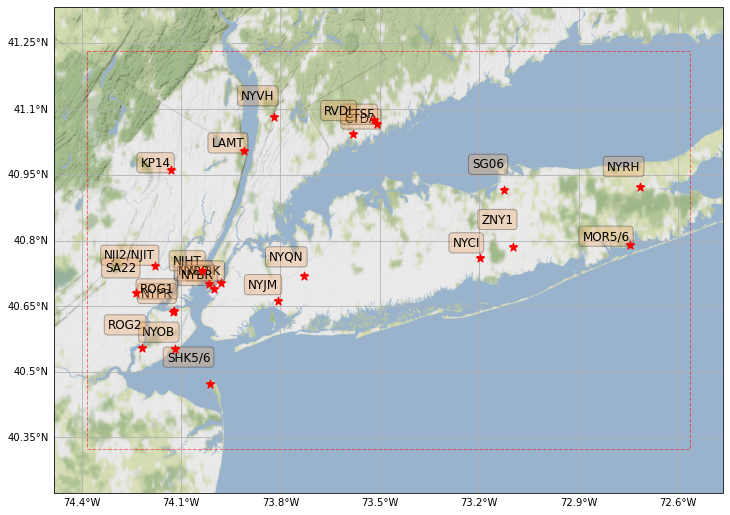

In [5]:
from VLM.bzGNSS.get_MIDAS import plot_gps_stations
df_gps   = prep_gps(Exp.path_gps, Exp.reg)
plot_gps_stations(df_gps);

## Velocity

### Rate and Uncertainty

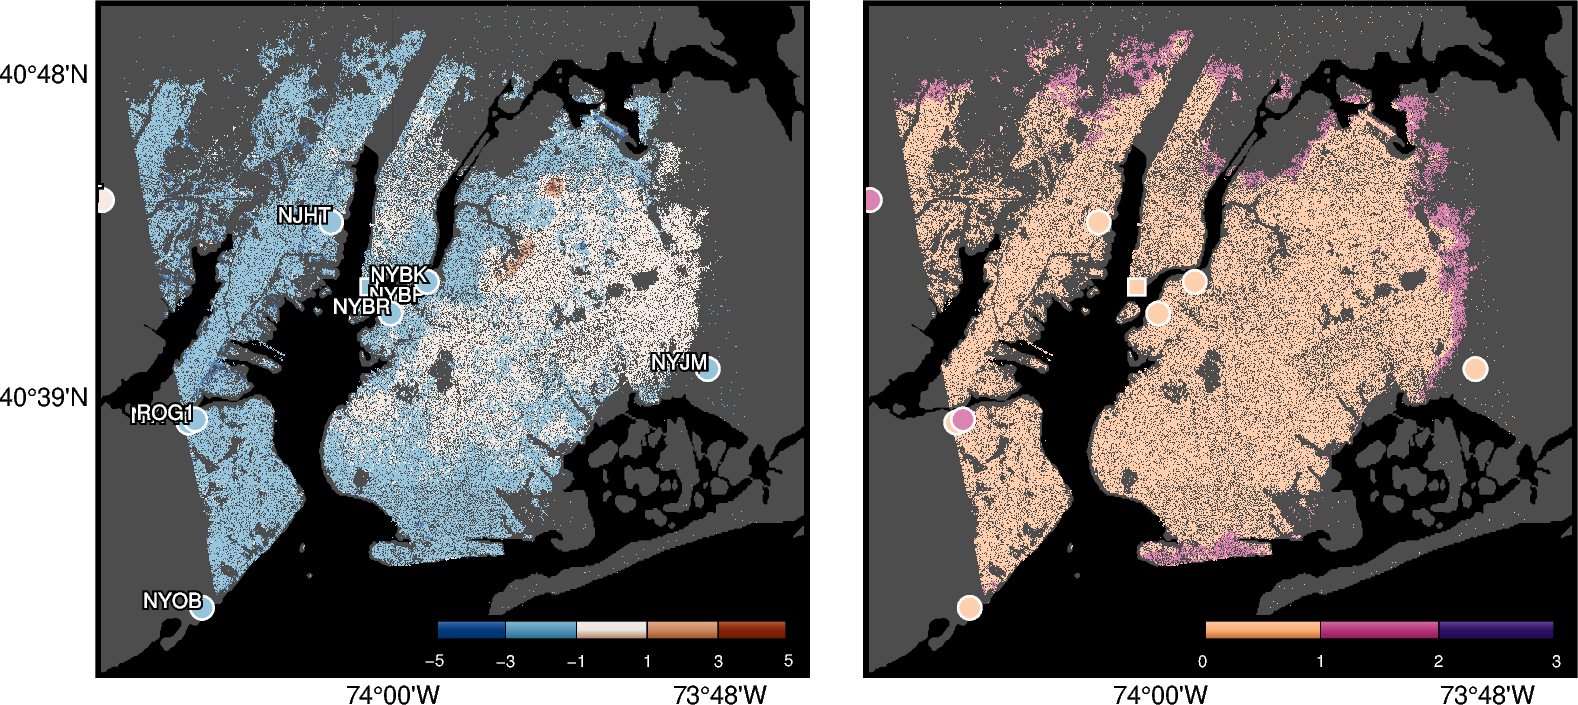

In [6]:
GMT_Plot = PlotVLM(Exp.reg, Exp.path_mp_exp)  
fig = GMT_Plot.plot_together_gps(rateM, uncM, df_gps, continuous=False)
fig.show(dpi=600, width=1000)


dst = f'{Exp.path_mp_exp_geo}/{Exp.reg}_rate_unc.png'
fig.savefig(dst, dpi=500, anti_alias=True, show=False)


grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain
grdimage [WARNING]: Your grid y's or latitudes appear to be outside the map region and will be skipped.
grdimage [WARNING]: No grid or image inside plot domain


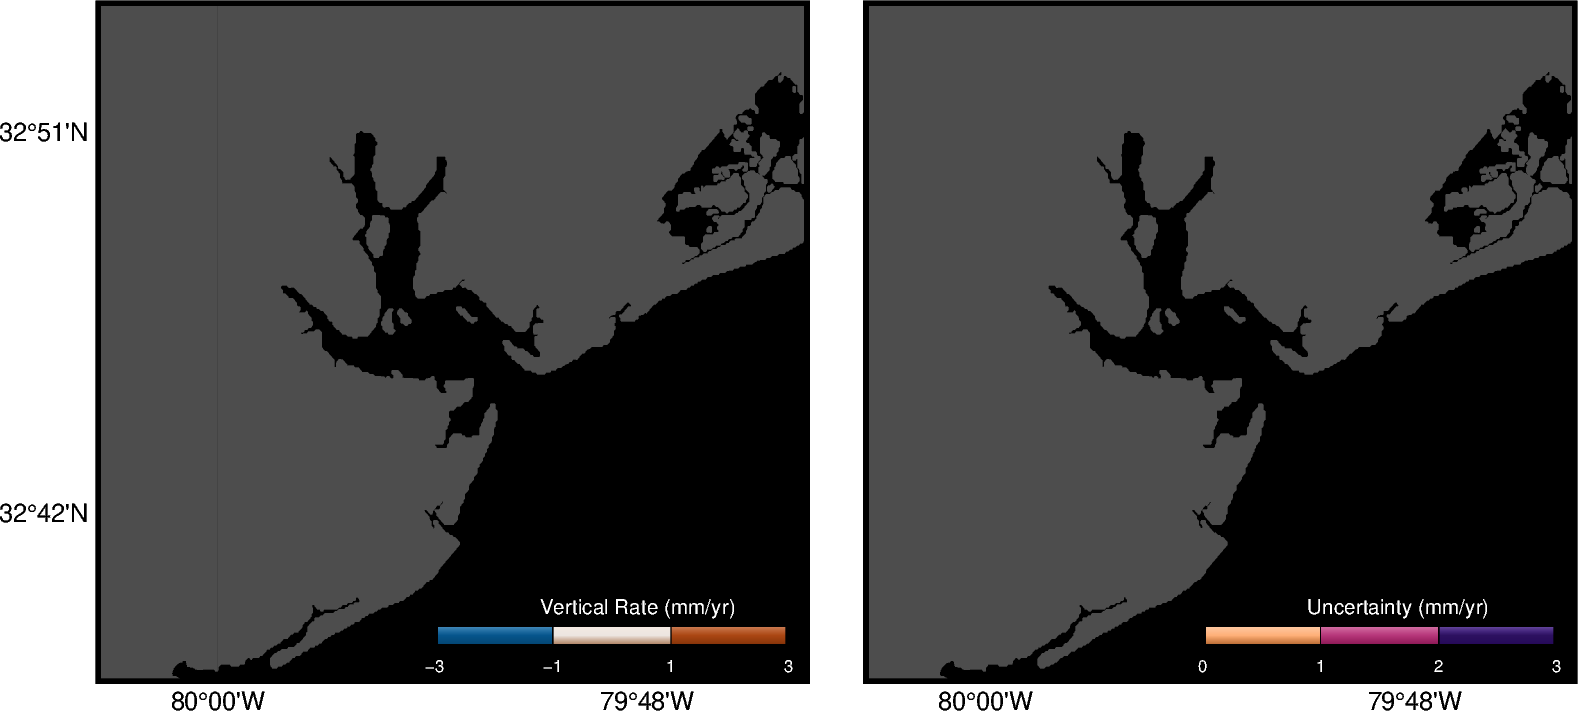

In [19]:
df_ts = pd.DataFrame({'lon':[-76.29524769, -76.43727838296977, -76.29712997497586],
         'lat': [36.8860484, 37.02951784410122, 36.82037385325801]})

fig = GMT_Plot.plot_together_custom(rateM, uncM, df_ts, df_gps, continuous=False)
fig.show(dpi=600, width=1000)                

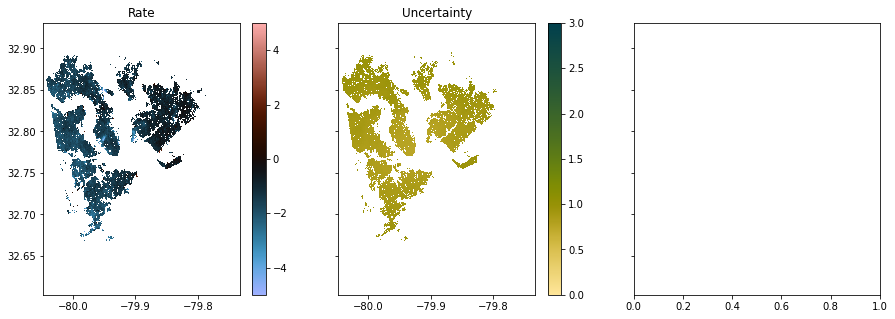

In [190]:
# quick looks
fig, (axe1, axe2, axe3) = plt.subplots(figsize=(15, 5), ncols=3, sharey=True)
xp1 = rateM.plot(ax=axe1, cmap='cmc.berlin', vmin=-5, vmax=5); axe1.set_title('Rate')
xp2 = uncM.plot(ax=axe2, cmap='cmc.bamako_r', vmin=0, vmax=3); axe2.set_title('Uncertainty')
# xp3 = mask.plot(ax=axe3, cmap='binary_r'); axe3.set_title('Mask');

for xp in [xp1, xp2]:
    xp.colorbar.set_label(''); xp.axes.set_xlabel(''); xp.axes.set_ylabel('');

### Transects

In [ ]:
from contrib.plotting import plotGMT

GMT_Plot = plotGMT.PlotVLM(Exp.reg, Exp.path_mp_exp_geo)
fig = GMT_Plot.plot_transects(rateM, df_gps, continuous=False)
fig.show(dpi=500, width=1000)

grdimage [WARNING]: Guessing of registration in conflict between x and y, using gridline
grdimage [ERROR]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdimage [ERROR]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdimage (gmtlib_read_grd_info): Use grdedit -A on your grid file to make region and increments compatible [/u/leffe-data2/buzzanga/data/VLM/Sentinel1/Charleston/MintPy_2alks_5rlks_33_15/geo_waterMask.nc]


['/u/leffe-data2/buzzanga/Software_InSAR/FRInGE/install/contrib/notebooks', '/home/buzzanga/BB_LIB', '/home/buzzanga/Google_Drive/BB_LIB', '/home/buzzanga/Google_Drive/BB_LIB/bin', '/u/leffe-data2/buzzanga/Software_InSAR/FRInGE/install/python', '/u/leffe-data2/buzzanga/Software_InSAR/FRInGE/install', '/u/leffe-data2/buzzanga/Software_InSAR/MintPy_git', '/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python39.zip', '/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9', '/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9/lib-dynload', '', '/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9/site-packages', '/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9/site-packages/IPython/extensions', '/u/leffe1/buzzanga/.ipython', '/u/leffe-data2/buzzanga/Software_InSAR/FRInGE/install/contrib/multilook']


/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Wrote: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Charleston/MintPy_2alks_5rlks_33_15/SCHA_Base/geo/Transects/arrows0.xy
Wrote: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Charleston/MintPy_2alks_5rlks_33_15/SCHA_Base/geo/Transects/arrows1.xy
Wrote: /u/leffe-data2/buzzanga/data/VLM/Sentinel1/Charleston/MintPy_2alks_5rlks_33_15/SCHA_Base/geo/Transects/arrows2.xy


/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/u/leffe-data2/buzzanga/Miniconda3/envs/FRInGE/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


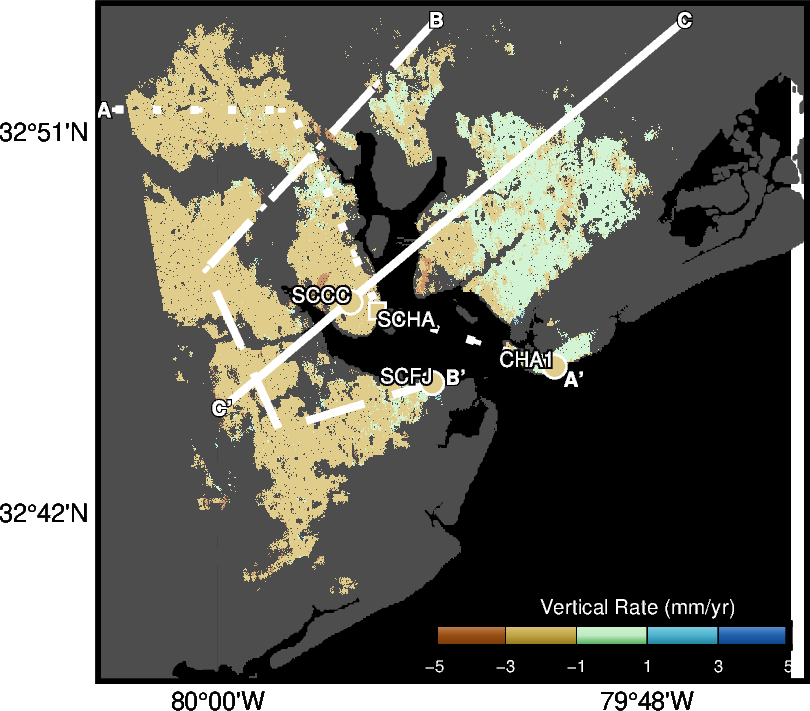

In [18]:
GMT_Plot = plotGMT.PlotVLM(Exp.reg, Exp.path_mp_exp_geo)

fig = GMT_Plot.plot_transects(rateM, df_gps,w_mask=Exp.path_mask_mp_nc, continuous=False)
fig.show(dpi=600, width=1000)   

### Compute the profiles in Matlab

- Have to run locally; no matlab on leffe

In [9]:
!cd {op.join(os.getenv('BB_LIB'), 'VLM', 'EC', 'Profiles')}
# cmd = f'Profiles_SE HR FRInGE'
cmd = 'Profiles_HR_FR'
cmd1 = f'matlab -nodesktop -r "{cmd}"'
print (cmd1)
!{cmd1}
# remember to now stop the notebook

matlab -nodesktop -r "Profiles_HR_FR"
/bin/bash: matlab: command not found


### Imaging

In [24]:
path_imag = op.join(op.dirname(Exp.path_gps), 'imaging', 'VLM_Global_Imaged_BB.nc')
ds_imag = xr.open_dataset(path_imag)
coords  = {coord:ds_imag[coord].astype(np.float32) for coord in 'lat lon'.split()}
ds_imag = ds_imag.assign_coords(coords).sortby('lat lon'.split())

In [26]:
da = ds_imag['VU']
da.load().sel(lon=slice(*Exp.SNWE[2:]), lat=slice(*Exp.SNWE[:2]))

<xarray.DataArray 'VU' (lat: 1, lon: 1)>
array([[nan]])
Coordinates:
  * lat      (lat) float32 40.75
  * lon      (lon) float32 -74.0

## Timeseries

### Setup

In [7]:
# setup (all lat/lon, y/x)
VAHP     = '37.062178 -76.403436' # (1339, 857; 864, 1099)
LOY2     = '36.764016798 -76.237800713' # ( 554?, 501)


# pt lat/lon, yx in fringe geo ts, sta to ref to (tsview will make ref point == 0)
# must use LOY2 or switch how the stitching is done if you want to have them agree with mintpy
dct_locs = {
    'Central Hampton': [[37.0396, -76.4079], [1462, 842], 'VAHP'],
    'Norfolk Shipyard': [[36.8146, -76.3046], [454, 1305], 'LOY2'],
    'Craney Island': [[36.9237, -76.3671], [2095, 921],  'LOY2'],
    'First Landing': [[36.9270, -76.0200], [2077, 2165], 'LOY2'],
    'E. Williamsburg': [[40.709116, -73.925341], [], 'NYBP'],
    'Woodside': [[40.747195, -73.899891], [], 'NYBP'],
}

In [8]:
# convenience
place    = 'Woodside'
loc      = dct_locs[place]
loc_lalo = loc[0]
gps_sta  = df_gps[df_gps.sta==loc[2]]
gps_loc  = f'{gps_sta.lat.item()} {gps_sta.lon.item()}'
gps_vup  = gps_sta.u_vel.item()

### Timeseries Point

tsview.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/MintPy_2alks_5rlks_11_5/NYBP_Base/geo/geo_timeseries_demErr.h5 --lalo 40.747195 -73.899891 --ref-lalo 40.7010694631 -74.01432426910003 -u mm -c roma_r -v -20 20 --ylim -20 20 --no-multilook --ms 4
open timeseries file: geo_timeseries_demErr.h5
No lookup table info range/lat found in files.
data   coverage in y/x: (0, 0, 1488, 1380)
subset coverage in y/x: (0, 0, 1488, 1380)
data   coverage in lat/lon: (-74.17001498763281, 40.868131290123046, -73.7566813236328, 40.48479765012304)
subset coverage in lat/lon: (-74.17001498763281, 40.868131290123046, -73.7566813236328, 40.48479765012304)
------------------------------------------------------------------------
estimate deformation model with the following assumed time functions:
    polynomial : 1
    periodic   : []
    stepDate   : []
    exp        : {}
    log        : {}
reading timeseries from file /u/leffe-data2/buzzanga/data/VLM/Sentinel1/NYC/MintPy_2alks_5rlks_11_5/NYBP_Base/

/u/leffe-data2/buzzanga/Software_InSAR/MintPy_git/mintpy/tsview.py:937: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  self.fig_img.canvas.set_window_title(self.figname_img)



---------------------------------------
Y/X = 435, 972, lat/lon = 40.7472, -73.8999
[0.0, -12.29, 2.35, -4.84, 5.67, -0.44, -1.41, -3.78, 1.32, 0.69, -6.94, -5.24, 5.14, 2.01, -1.85, -1.37, -25.1, 3.56, 4.7, 2.38, -10.38, 1.07, 17.58, 2.99, 11.91, -14.81, 3.61, 7.87, -17.27, 17.58, 5.63, -14.08, 14.25, 4.97, 5.67, 6.47, 17.1, 20.48, 9.36, -6.98, 10.06, 1.87, 3.17, 11.37, 13.58, 11.39, 10.47, 8.99, 10.9, 11.24, 12.38, 17.46, 11.77, 26.11, 10.02, 8.1, -24.52, -8.57, 41.19, 18.52, 13.86, 10.64, 10.29, 13.0, 19.15, 14.33, 16.32, 11.4, 15.75, 15.39, 15.11, 14.56, 18.99, 6.92, 8.42, 17.91, 21.7, 6.07, 4.0, 5.81, 16.05, 6.82, 9.23, 8.67, 19.52, 6.63, 0.04, 13.23, 14.92, 17.72, 6.27, 19.03, 7.41, 15.54, 18.51, 11.96, 16.14, -7.49, 13.45, -5.4, 17.39, 14.85, 15.34, 15.8, 22.66, -11.25, 12.33, 14.25, 19.62, 27.27, 2.5, 12.39, 11.97, 3.39, 8.03, -19.5, 0.39, -1.9, -21.53, 10.74, 37.45, 17.37, 8.91, 18.55, 13.43, -12.99, 16.63, 16.95, 15.92, 17.45, 13.82, 13.95, 18.35, 25.21, 21.74, 19.6, 10.15]


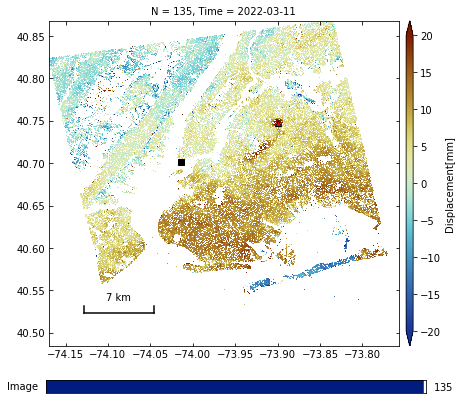

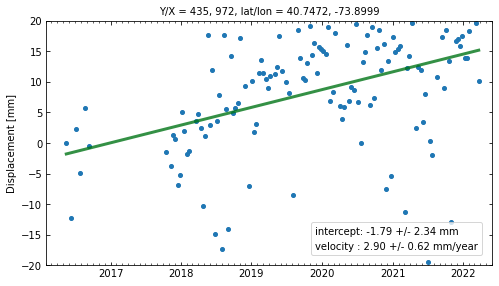

In [29]:
cmd  = f'tsview.py {Exp.path_ts_geo} --lalo {loc_lalo[0]} {loc_lalo[1]} --ref-lalo {gps_loc} ' 
cmd += '-u mm -c roma_r -v -20 20 --ylim -20 20 --no-multilook --ms 4'

obj = timeseriesViewer(cmd); obj.configure(); obj.plot();

### Standard deviation of the timeseries



view.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/MintPy_7alks_19rlks_33_15/geo_TSig_SBAS-2.h5 tsStd -u mm --figsize 10 10 -c afmhot_r --noverbose --noref -v 0 35


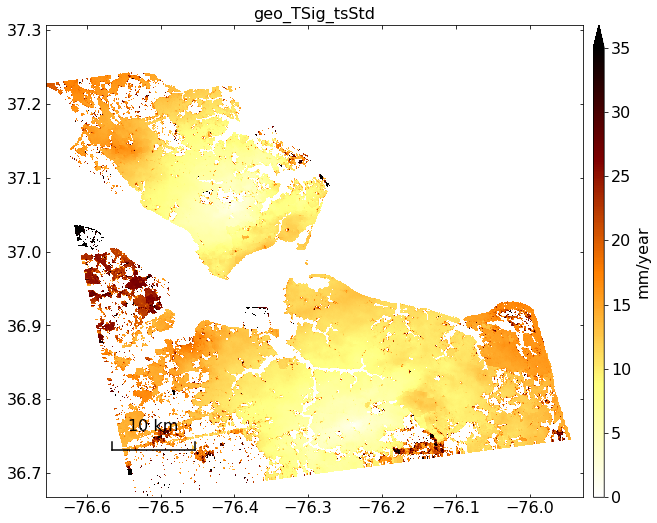

In [64]:
%matplotlib inline
Exp = ExpBase(HR_SBAS_90)
cmd = f'view.py {Exp.path_tsig_geo} tsStd -u mm --figsize 10 10 -c afmhot_r --noverbose --noref -v 0 35' 
obj = viewer(cmd); obj.configure(); obj.plot()

view.py /u/leffe-data2/buzzanga/data/VLM/Sentinel1/HR2/MintPy_7alks_19rlks_33_15/geo_TSig_SR.h5 tsStd -u mm --figsize 10 10 -c afmhot_r --noverbose --noref


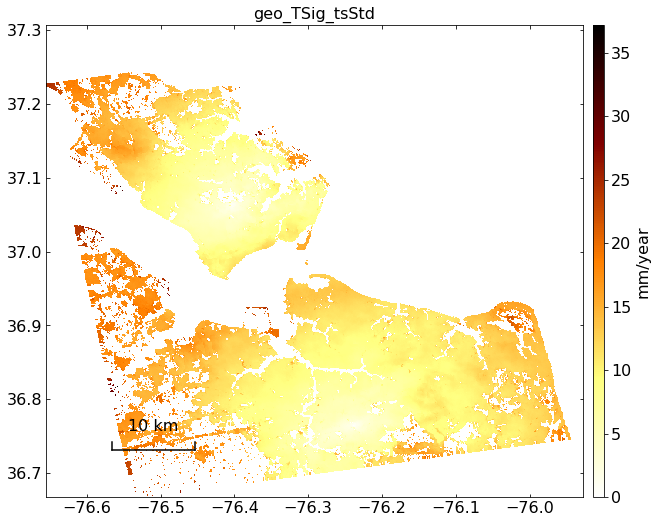

In [62]:
Exp = ExpBase(HR_90)
cmd = f'view.py {Exp.path_tsig_geo} tsStd -u mm --figsize 10 10 -c afmhot_r --noverbose --noref ' 
obj = viewer(cmd); obj.configure(); obj.plot()

## Misc

### convert the final masked Vup to kmz

In [113]:
cmd = f'save_kmz.py {path_vup_geo} velocity -m {path_mask_vup} --noreference -c roma -v -5 4 -u mm -o {path_rate_kmz}'
print (cmd)
!{cmd}

cmd = f'save_kmz.py {path_vup_geo} velocityStd -m {path_mask_vup} --noreference -c roma_r -v 0 5 -u mm -o {path_std_kmz}'
print (cmd)
!{cmd}

save_kmz.py /Users/buzzanga/data/VLM/Sentinel1/HR/MintPy_2alks_5rlks_33_15/Vup/geo_Vup.h5 velocity -m /Users/buzzanga/data/VLM/Sentinel1/HR/MintPy_2alks_5rlks_33_15/Vup/geo_Vup_mask.h5 --noreference -c roma -v -5 4 -u mm -o /Users/buzzanga/data/VLM/Sentinel1/HR/MintPy_2alks_5rlks_33_15/Vup/geo_rate
data   coverage in y/x: (0, 0, 2479, 3495)
subset coverage in y/x: (0, 0, 2479, 3495)
update LENGTH, WIDTH, Y/XMAX
update/add SUBSET_XMIN/YMIN/XMAX/YMAX: 0/0/2479/3495
update Y/X_FIRST
update REF_Y/X
read mask from file: geo_Vup_mask.h5
masking out pixels with zero value in file: /Users/buzzanga/data/VLM/Sentinel1/HR/MintPy_2alks_5rlks_33_15/Vup/geo_Vup_mask.h5
colormap: roma
plotting data ...
figure size : [13.63, 12.00]
no plot for reference point.
writing /Users/buzzanga/data/VLM/Sentinel1/HR/MintPy_2alks_5rlks_33_15/Vup/geo_rate.png with dpi=600
writing /Users/buzzanga/data/VLM/Sentinel1/HR/MintPy_2alks_5rlks_33_15/Vup/geo_rate_cbar.png
writing /Users/buzzanga/data/VLM/Sentinel1/HR/MintP

#### HR 2020

In [114]:
#### not sure this is necessary but keeping for posterity
## force the shapes to match the velocity dataset
ds_rate = gdal.Translate('', path_rate_orig0, format='MEM', width=874, height=571)
ds_unc  = gdal.Translate('', path_unc_orig0, format='MEM', width=874, height=571)
nodata  = ds_rate.GetRasterBand(1).GetNoDataValue() # 9999

rate2020 = ds_rate.ReadAsArray()
rate2020 = np.where(np.isclose(rate2020, nodata), np.nan, rate2020/1000)

unc2020  = ds_unc.ReadAsArray()
unc2020  = np.where(np.isclose(unc2020, nodata), np.nan, unc2020/1000)
del ds_rate, ds_unc

In [129]:
os.chdir(op.dirname(path_stitch_mp))
# save kmz cant seem to take this nonrelative dst 
dst_kmz = op.join(op.dirname(path_stitch_mp), 'geo_rate')
dst_kmz = 'geo_rate'


cmd = f'save_kmz.py {path_stitch_mp} velocity -m {path_ifgram_mask} --noreference -c roma -v -5 4 -u mm -o {dst_kmz}'
print (cmd)
!{cmd}


# dst_kmz = dst_kmz.replace('rate', 'std')

# cmd = f'save_kmz.py {path_stitch_mp} velocityStd -m {path_ifgram_mask} --noreference -c roma_r -v 0 5 -u mm -o {dst_kmz}'
# print (f'\n{cmd}')
# !{cmd}

save_kmz.py /Users/buzzanga/data/VLM/Sentinel1/track_004/Results/IGS14_GRL2020/Vup_Mintpy/Vup/geo_Vup.h5 velocity -m /Users/buzzanga/data/VLM/Sentinel1/track_004/Results/IGS14_GRL2020/Vup_Mintpy/numInvIfgram.h5 --noreference -c roma -v -5 4 -u mm -o geo_rate
data   coverage in y/x: (0, 0, 874, 571)
subset coverage in y/x: (0, 0, 874, 571)
update LENGTH, WIDTH, Y/XMAX
update/add SUBSET_XMIN/YMIN/XMAX/YMAX: 0/0/874/571
update Y/X_FIRST
update REF_Y/X
read mask from file: numInvIfgram.h5
masking out pixels with zero value in file: /Users/buzzanga/data/VLM/Sentinel1/track_004/Results/IGS14_GRL2020/Vup_Mintpy/numInvIfgram.h5
colormap: roma
plotting data ...
figure size : [18.37, 12.00]
no plot for reference point.
writing /Users/buzzanga/data/VLM/Sentinel1/track_004/Results/IGS14_GRL2020/Vup_MintPy/Vup/geo_rate.png with dpi=600
writing /Users/buzzanga/data/VLM/Sentinel1/track_004/Results/IGS14_GRL2020/Vup_MintPy/Vup/geo_rate_cbar.png
writing /Users/buzzanga/data/VLM/Sentinel1/track_004/Resu

### Convert from xy to lalo and back

In [67]:
## Fringe
from mintpy.utils import readfile, utils as ut
atr = readfile.read_attribute(Exp.path_tc)
coord = ut.coordinate(atr, lookup_file=Exp.path_geom_mp)

In [110]:
## ARIA
atr = readfile.read_attribute(Exp.path_tc)
coord = ut.coordinate(atr, lookup_file=Exp.path_geometryGeo)

In [54]:
# yx -> lalo
y, x = 2659, 1220
coord.radar2geo(y, x)[0:2]

(40.60943746181836, -73.98688598648437)

In [36]:
df_gps[df_gps.sta=='SPVA']

,sta,lat,lon,u_vel,u_sig
5,SPVA,36.942654,-76.328681,-2.144,1.559


In [71]:
Exp.SNWE = 40.53000000, 40.8229600000, -74.17000000, -73.756498000

In [72]:
# lalo -> yx
SW, NW, SE, NE = (Exp.SNWE[0], Exp.SNWE[2]), (Exp.SNWE[1], Exp.SNWE[2]),(Exp.SNWE[0], Exp.SNWE[3]),(Exp.SNWE[1], Exp.SNWE[3])

# lat, lon = (36.94362595994582, -76.3264497256022)
# lat, lon = (36.786022, -76.178025) # portsmouth
for dd in [SW, NW, SE, NE]:
    lat, lon = dd
    y, x = coord.geo2radar(lat, lon)[0:2]
    print (lat, lon)
    print (y, x)
    lat, lon = coord.radar2geo(y, x)[0:2]
    print (lat, lon)
    print ('')

    
    

40.53 -74.17
1362 0
40.53169607564612 -74.16769617165296

40.82296 -74.17
2504 285
40.82270011902996 -74.16999401465682

40.53 -73.756498
1135 1784
40.52979347232906 -73.75665426698785

40.82296 -73.756498
2286 2089
40.82291579465452 -73.75669463957625



### Quick phass test

In [41]:
path_phass = op.join(path_wraps, 'phass')
path_wrap1 = op.join(path_phass, '20150310_20211109.int')
path_corr  = op.join(path_phass, 'tcorr_ds_ps.bin')

In [42]:
cmd = f'python `which unwrap_phass_MG.py` -i {path_wrap1} -c {path_corr}'

print (cmd)

# !{cmd}

python `which unwrap_phass_MG.py` -i /Users/buzzanga/data/VLM/Sentinel1/HR/PS_DS_33_15/phass/20150310_20211109.int -c /Users/buzzanga/data/VLM/Sentinel1/HR/PS_DS_33_15/phass/tcorr_ds_ps.bin
